# Table of Contents

- [Libraries](#Libraries)
- [Reading the Data](#Reading-the-Data)
- [EDA](#EDA)
- [Data Visualization and Analysis](#Data-Visualization-and-Analysis)
    - [Categorical Data](####Categorical-Data)
    - [Numerical Data](####Numerical-Data)
- [Data Preparation](#Data-Preparation)
- [Model Evaluation](#model-evaluation)

# Libraries

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor

# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [157]:
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [158]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [159]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [160]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# EDA

1. Dropping Car ID column as it is not relevant.
2. Checking the numerical and categorical variables.
3. Removing the Model Number from the CarName and Correcting the names also of the Car Makers
4. Changing the datatype of symboling as it is categorical variable as per file

In [161]:
# Dropping Car_ID

car = car.drop('car_ID',axis=1)

In [162]:
# Split the 'CarName' column

car[['Make', 'Model']] = car['CarName'].str.split(' ', n=1, expand=True)
car = car.rename(columns={'Make': 'CarMake', 'Model': 'CarModel'})
car = car.drop(columns={'CarName','CarModel'})

# Check the resulting DataFrame
car.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarMake
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [163]:
# mazda car has been misspelled as maxda at many places 
# porsche has been misspelled as porcshce 
# toyota car has been mentioned as toyouta
# Nissan has been referred as nissan in some cases
# Volkswagen car has been misspelled as vokswagen and vw

car['CarMake'] = car['CarMake'].replace({"maxda": "mazda","porcshce": "porsche","toyouta": "toyota",
                                   "nissan": "Nissan","vokswagen": "volkswagen","vw": "volkswagen"})
car.head() 

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarMake
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [164]:
# changing the datatype of symboling as it is categorical variable as per dictionary file

car['symboling'] = car['symboling'].astype(str)

In [165]:
categorical_columns = car.select_dtypes(include=['object'])
numerical_columns = car.select_dtypes(exclude=['object'])



# Data Visualization and Analysis

#### Categorical Data

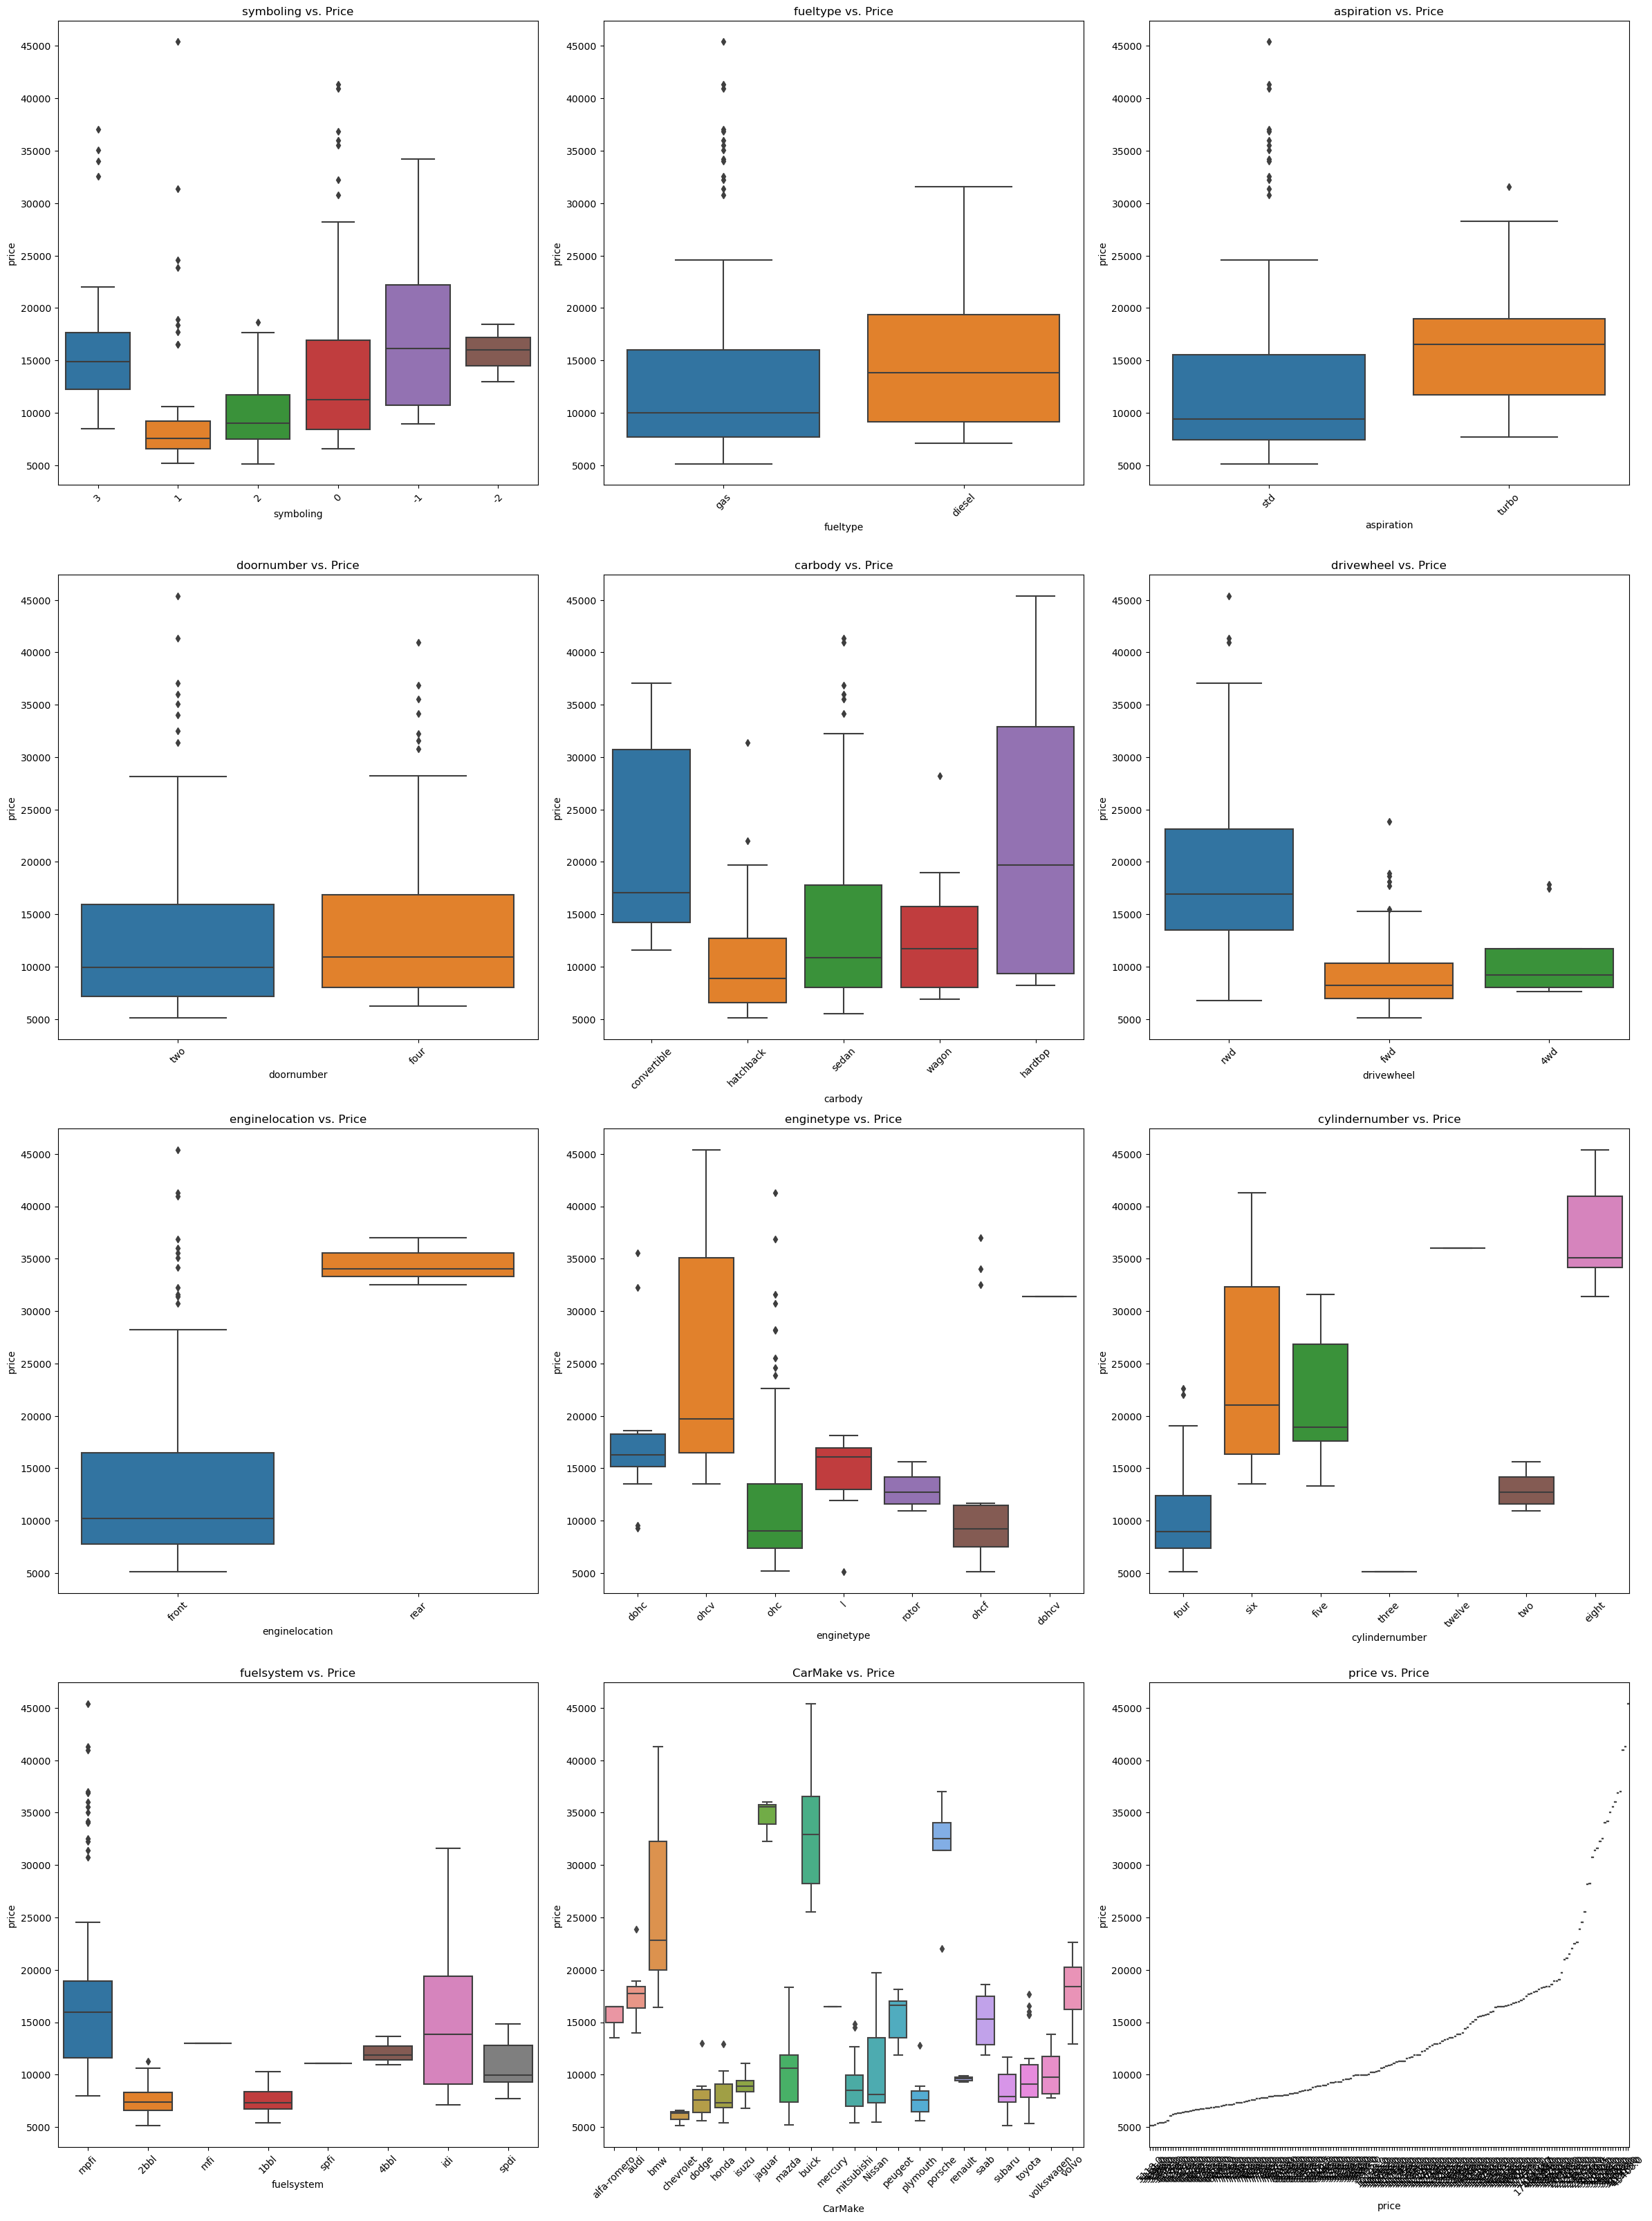

In [166]:
categorical_columns['price'] = car['price']
### Creating Box plot for each Categorical Variable


num_cols = len(categorical_columns)
num_plots_per_row = 3
num_rows = (num_cols + num_plots_per_row - 1) // num_plots_per_row

plt.figure(figsize=(num_plots_per_row * 8, num_rows * 8))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_plots_per_row, i)
    sns.boxplot(y='price', x=column, data=categorical_columns)
    plt.xticks(rotation=45)
    plt.title(f'{column} vs. Price')

plt.tight_layout()
plt.show()

---------------------------------------------------------Inputs on Categorical Data-------------------------------------------------------


1. In comparison to cars with fuel type gas, cars with fuel type diesel are relatively more expensive.
2. DoorNumber has little bearing on the cost.
3. Compared to convertible carbodies, all carbody kinds are comparatively less expensive.
4. The cost of rear-engine cars is significantly higher than that of front-engine cars.
5. Cars in the upper price bracket often have ohcv engines.
6. The majority of the time, an automobile's price is directly correlated with its engine count.
7. HigerEnd vehicles appear to have a right-hand drivewheel


#### Numerical Data

<Axes: xlabel='price', ylabel='Density'>

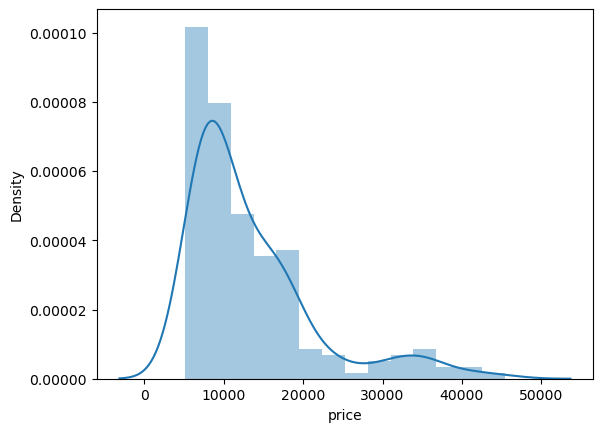

In [167]:
sns.distplot(car['price'],kde=True)

<Axes: >

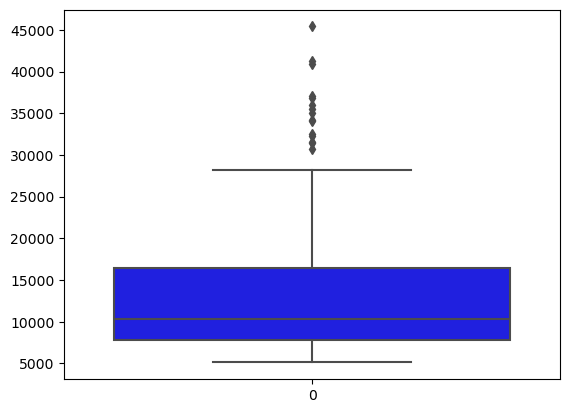

In [180]:
sns.boxplot(car['price'],color='blue')

##### 1. Right-Skewed Density Curve:
The bulk of automobile prices in the dataset are clustered at the lower end, according to the right-skewed density curve of car prices. This suggests that while fewer cars have noticeably higher prices, the majority of cars in the dataset have lower prices. To put it another way, the dataset has a long tail of cars that are significantly more expensive than the average.

##### 2.Outliers
The price distribution has outliers, as the boxplot illustrates. Data points that substantially depart from the core body of the data are called outliers. The individual data points that are located outside of the boxplot's "whiskers" are used to depict these outliers. These extreme numbers may have a significant effect on statistical analysis or modeling even while the sample is small. It has been seen, nonetheless, that you have decided not to address these outliers in your analy

##### 3. Mean-Median Difference:
The price distribution's mean and median may be clearly seen to differ from one another in the boxplot. To be more precise, the mean price usually exceeds the median price. This implies that the distribution is positively skewed, with the mean being pulled upward by a small number of highly priced outliers. For this distribution, the median offers a more accurate representation of the central tendency since it is less susceptible to extreme extremes.

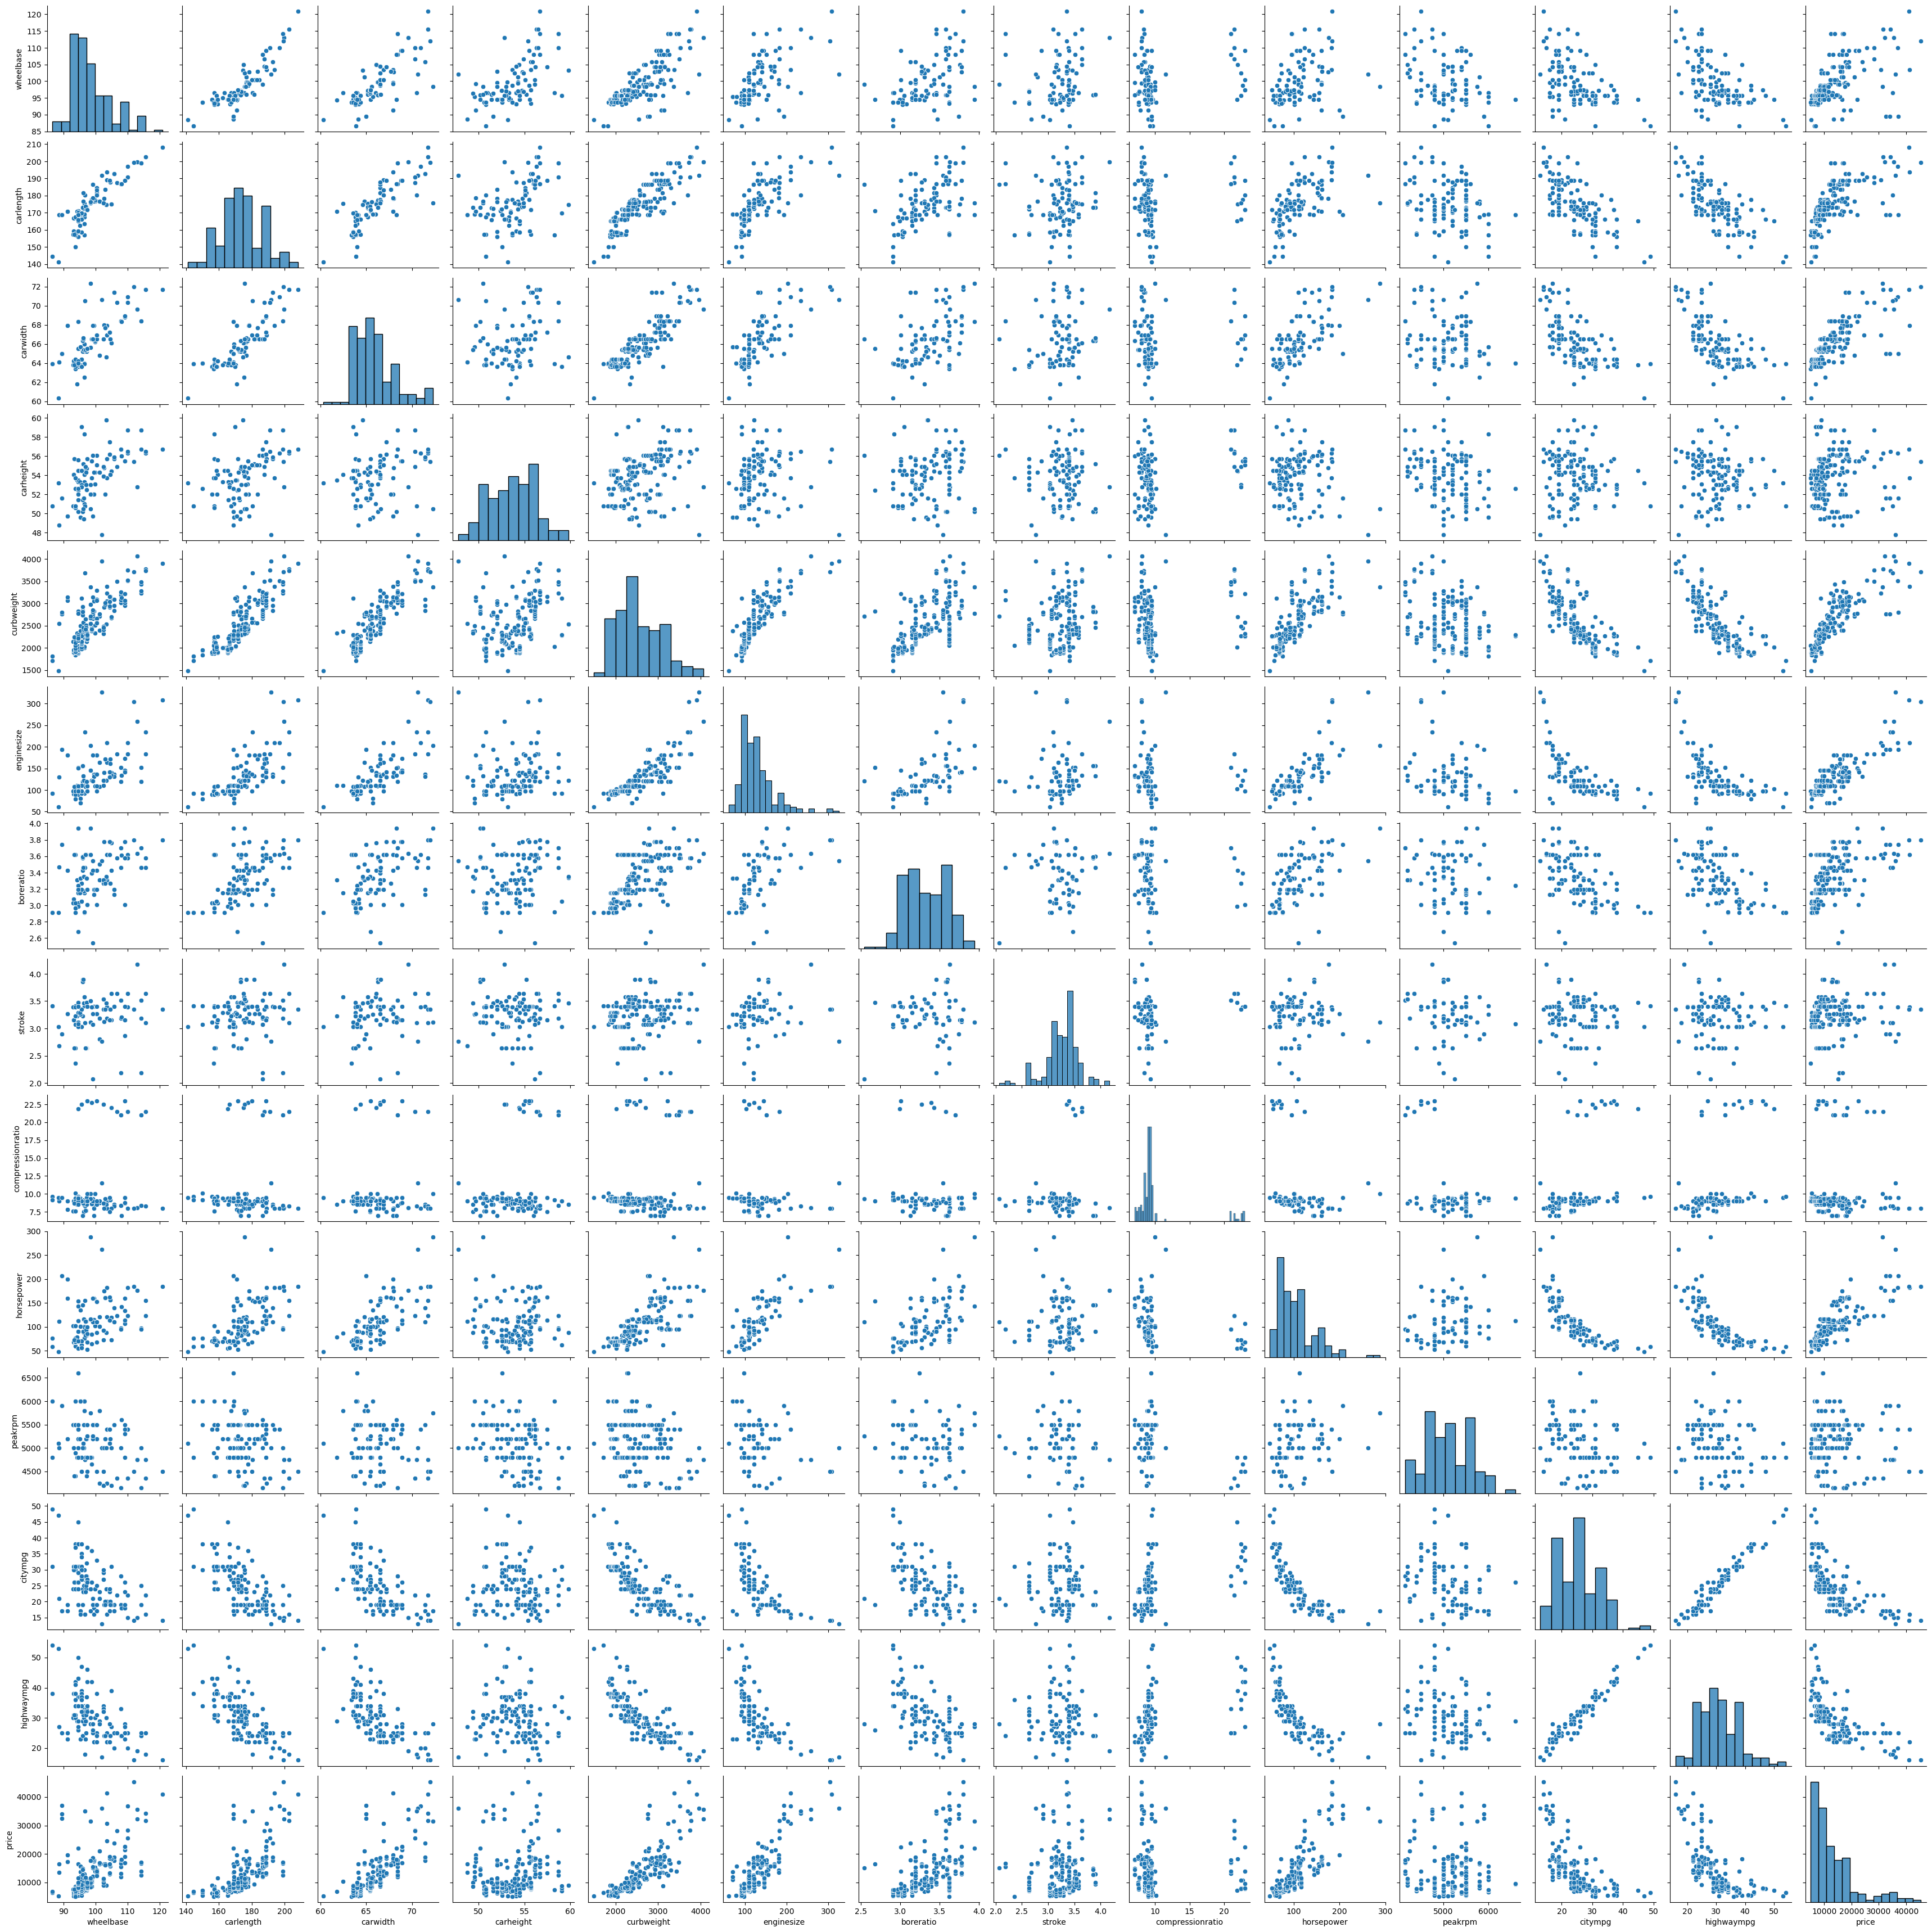

In [168]:
sns.pairplot(numerical_columns)

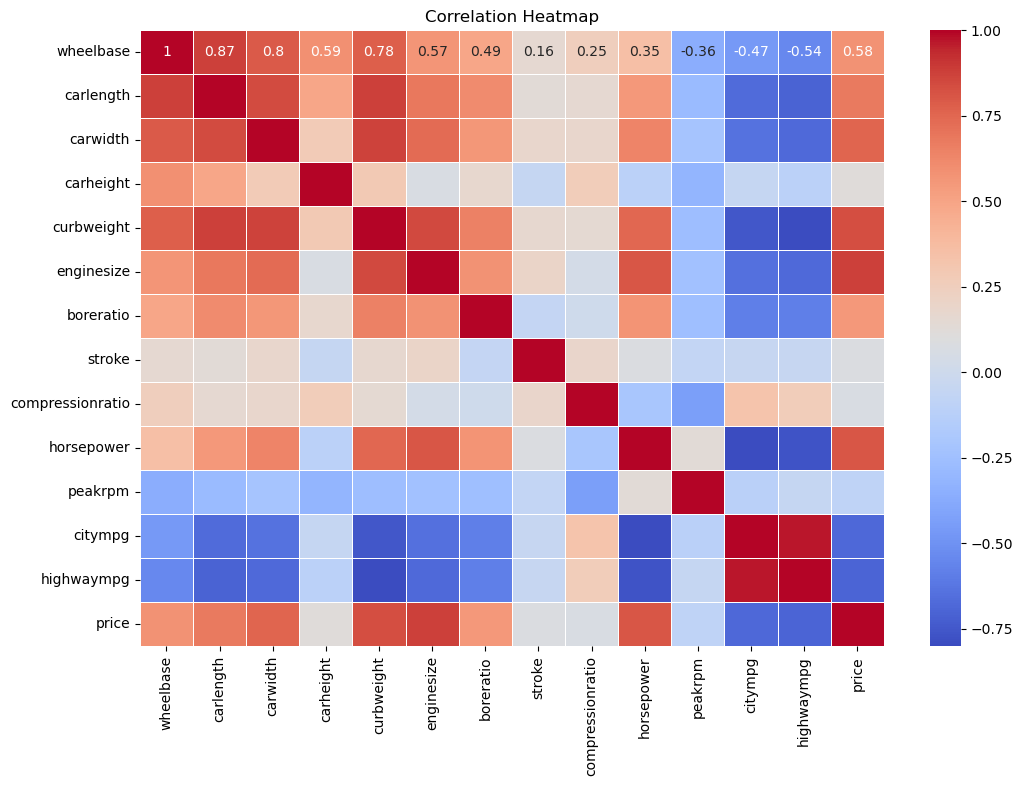

In [169]:
corr_matrix=numerical_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


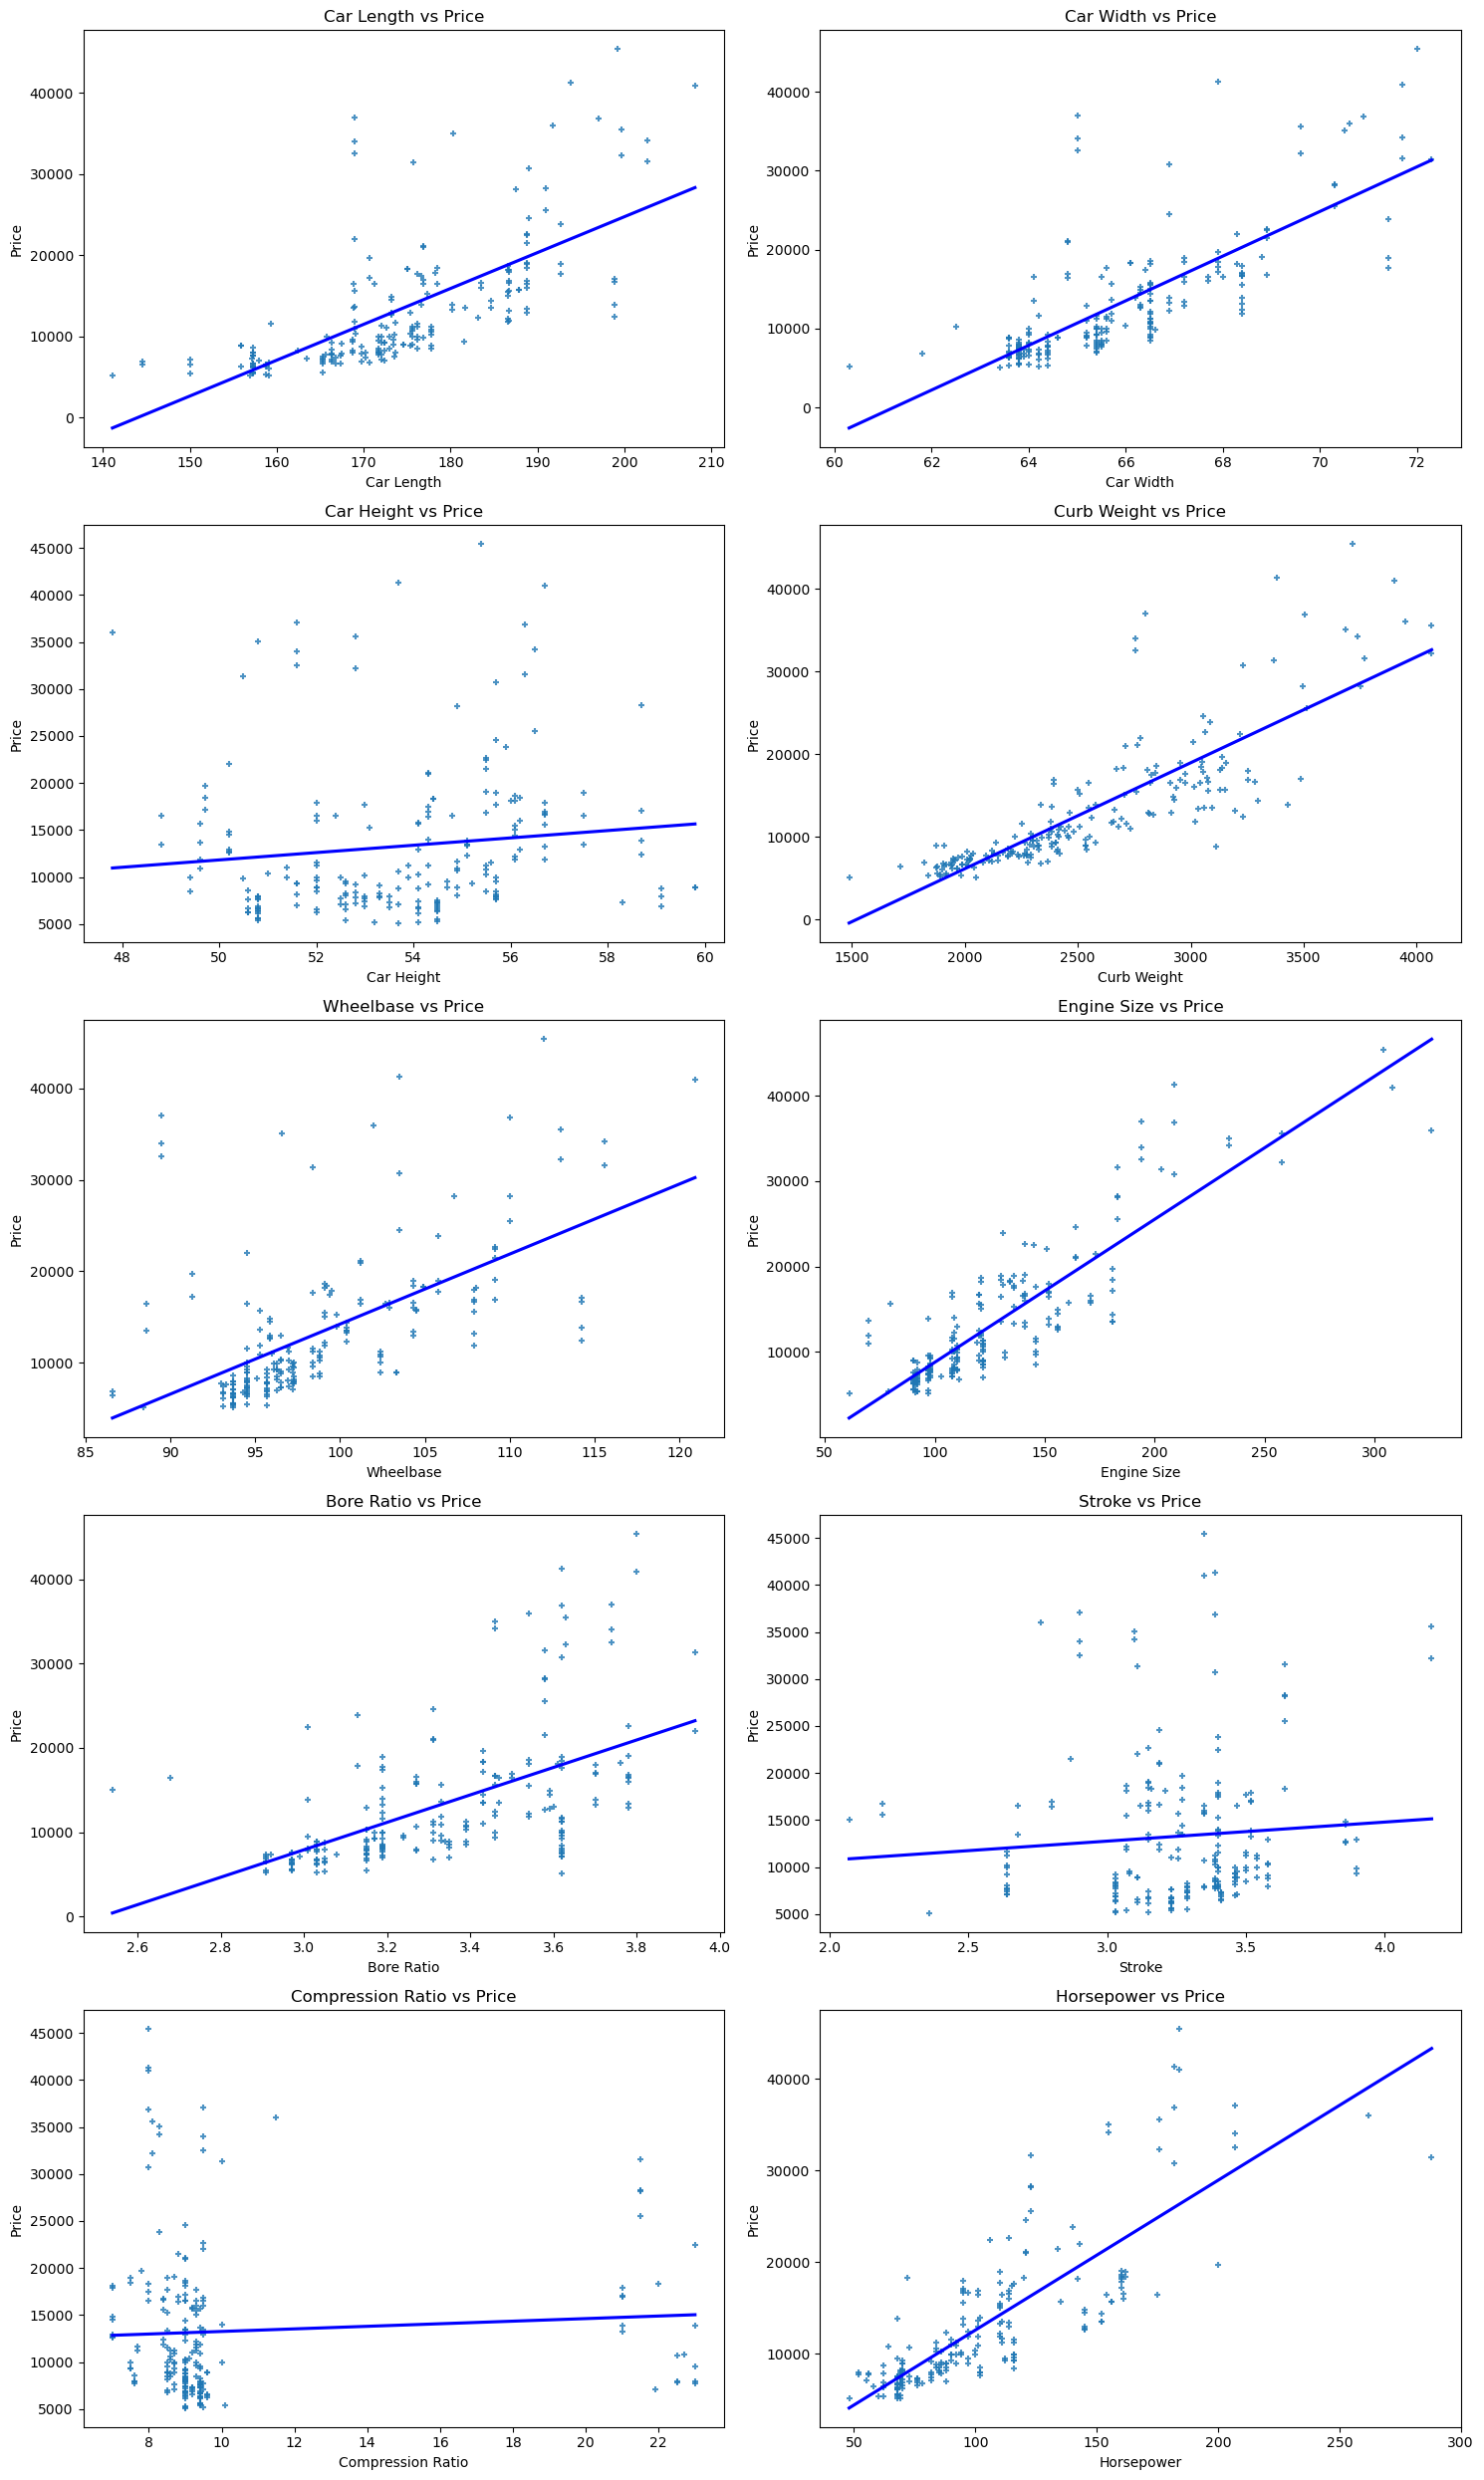

In [170]:
def regplot(x, y, fig, xlabel, ylabel, car):
    plt.subplot(5, 2, fig)
    sns.regplot(x=x, y=y, data=car, scatter_kws={"s": 20}, line_kws={"color": "blue"}, ci=None, marker='+')
    plt.title(f'{xlabel} vs {ylabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

# Create a figure with subplots
plt.figure(figsize=(15, 25))

# Plot regression plots for selected features
regplot('carlength', 'price', 1, 'Car Length', 'Price', car)
regplot('carwidth', 'price', 2, 'Car Width', 'Price', car)
regplot('carheight', 'price', 3, 'Car Height', 'Price', car)
regplot('curbweight', 'price', 4, 'Curb Weight', 'Price', car)
regplot('wheelbase', 'price', 5, 'Wheelbase', 'Price', car)
regplot('enginesize', 'price', 6, 'Engine Size', 'Price', car)
regplot('boreratio', 'price', 7, 'Bore Ratio', 'Price', car)
regplot('stroke', 'price', 8, 'Stroke', 'Price', car)
regplot('compressionratio', 'price', 9, 'Compression Ratio', 'Price', car)
regplot('horsepower', 'price', 10, 'Horsepower', 'Price', car)

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()


##### Significant variables after Visualization

 Car_Make , Engine Type, Fuel Type ,
 Car Body , Aspiration , Cylinder Number ,
Drivewheel , Curbweight , Car Length ,
Car Length , Car width , Engine Size ,
Boreratio , Horse Power , Wheel base ,
citympg , highwaympg , symboling 

# Data Preparation

##### We can also create 3 Segments - Luxury, Medium, Economic based on prices of every Car Maker

In [171]:
sig_col = ['price','CarMake','symboling','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']

car_final=car[sig_col]

In [172]:
car_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   CarMake         205 non-null    object 
 2   symboling       205 non-null    object 
 3   enginetype      205 non-null    object 
 4   fueltype        205 non-null    object 
 5   aspiration      205 non-null    object 
 6   carbody         205 non-null    object 
 7   cylindernumber  205 non-null    object 
 8   drivewheel      205 non-null    object 
 9   wheelbase       205 non-null    float64
 10  curbweight      205 non-null    int64  
 11  enginesize      205 non-null    int64  
 12  boreratio       205 non-null    float64
 13  horsepower      205 non-null    int64  
 14  citympg         205 non-null    int64  
 15  highwaympg      205 non-null    int64  
 16  carlength       205 non-null    float64
 17  carwidth        205 non-null    flo

In [173]:
# Create a pivot table to calculate the average price by make
make_avg = car_final.groupby('CarMake')['price'].mean().sort_values(ascending=False).reset_index()

# Rename the 'price' column to 'average_price'
make_avg.rename(columns={'price': 'average_price'}, inplace=True)

In [174]:
car_final1 = car_final.merge(make_avg, how='left', on='CarMake')

bins = [float('-inf'), np.percentile(car_final1['average_price'], 33), np.percentile(car_final1['average_price'], 67), float('inf')]
bin_labels = ['Economic', 'Medium', 'Luxury']

car_final1['class'] = pd.cut(car_final1['average_price'], bins, labels=bin_labels)

car_final1['class'] = car_final1['class'].astype(str)

car_final1 = car_final1.drop('CarMake', axis=1)

car_final1 = car_final1.drop('average_price', axis=1)

car_final1.head()

,price,symboling,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,class
0,13495.0,3,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1,Luxury
1,16500.0,3,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1,Luxury
2,16500.0,1,ohcv,gas,std,hatchback,six,rwd,94.5,2823,152,2.68,154,19,26,171.2,65.5,Luxury
3,13950.0,2,ohc,gas,std,sedan,four,fwd,99.8,2337,109,3.19,102,24,30,176.6,66.2,Luxury
4,17450.0,2,ohc,gas,std,sedan,five,4wd,99.4,2824,136,3.19,115,18,22,176.6,66.4,Luxury


In [175]:
car_final_cat=['symboling','enginetype','fueltype','aspiration','carbody','cylindernumber','drivewheel','class']

# Perform one-hot encoding for the categorical columns
car_data_final = pd.get_dummies(car_final1, columns=car_final_cat, drop_first=True)

car_data_final.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd,class_Luxury,class_Medium
0,13495.0,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,False,True,False,False,False,False,False,True,True,False
1,16500.0,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,False,True,False,False,False,False,False,True,True,False
2,16500.0,94.5,2823,152,2.68,154,19,26,171.2,65.5,...,False,False,True,False,False,False,False,True,True,False
3,13950.0,99.8,2337,109,3.19,102,24,30,176.6,66.2,...,False,True,False,False,False,False,True,False,True,False
4,17450.0,99.4,2824,136,3.19,115,18,22,176.6,66.4,...,True,False,False,False,False,False,False,False,True,False


In [176]:
car_data_final.shape

(205, 37)

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

target_variable = 'price'

X = car_data_final.drop(target_variable, axis=1)
y = car_data_final[target_variable]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (143, 36)
X_test shape: (62, 36)
y_train shape: (143,)
y_test shape: (62,)


# Model Evaluation

In [182]:
models = {
    'Linear Regression': LinearRegression(),
    'SGD Regressor': SGDRegressor(),
    'Ridge Regression': Ridge(alpha=0.1),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Train models and evaluate performance
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    results[model_name] = {
        'MSE Train Data': mse_train,
        'MSE Test Data': mse_test,
        'R2 Train Data': r2_train,
        'R2 Test Data': r2_test
    }

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results).T
print(results_df)


                   MSE Train Data  MSE Test Data  R2 Train Data  R2 Test Data
Linear Regression    2.557502e+06   8.432409e+06       0.958039      0.878293
SGD Regressor        3.785777e+06   1.369229e+07       0.937887      0.802375
Ridge Regression     2.709282e+06   9.928093e+06       0.955549      0.856705
Lasso Regression     2.557736e+06   8.457355e+06       0.958035      0.877933
